In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')
df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]

In [3]:
df.describe()

cgpa  placement_exam_marks       placed
count  1000.000000           1000.000000  1000.000000
mean      6.961240             32.225000     0.489000
std       0.615898             19.130822     0.500129
min       4.890000              0.000000     0.000000
25%       6.550000             17.000000     0.000000
50%       6.960000             28.000000     0.000000
75%       7.370000             44.000000     1.000000
max       9.120000            100.000000     1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [5]:
df.duplicated().sum()

np.int64(19)

/tmp/ipython-input-3625224646.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/tmp/ipython-input-3625224646.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

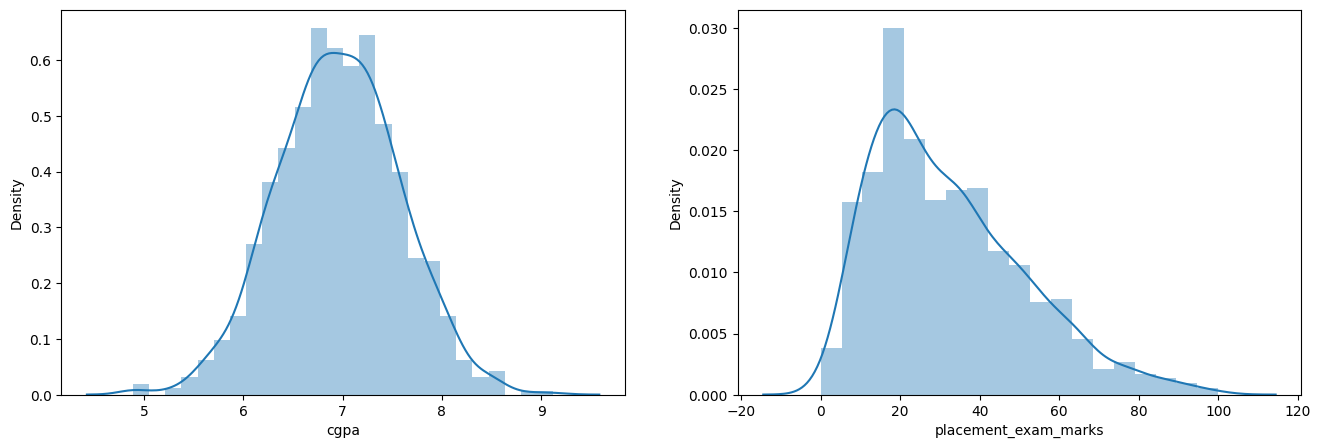

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

# placement_exam_marks is skewed_distribution

In [7]:
df['placement_exam_marks'].skew() ,  df['cgpa'].skew()
   #very skewed ,for this 0.835641 nearly1 ,this_shows that itis_+vily skewed and has tailonthe_right_side , -0.0145 shows it_is_symmetric

(np.float64(0.8356419499466834), np.float64(-0.014529938929314918))

<Axes: xlabel='placement_exam_marks'>

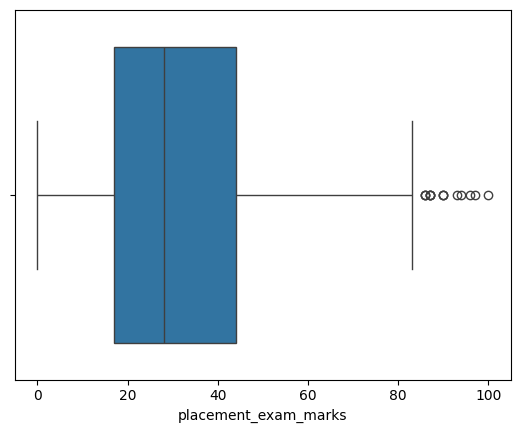

In [8]:
sns.boxplot(x=df['placement_exam_marks'])
#the outliers areonthe_RHS

In [9]:
sns.boxplot(x=df['cgpa'])

<Axes: xlabel='cgpa'>

FIRST OF_ALL CALCUALTING THE IQR - interquartile range

In [10]:
precen25 = df['placement_exam_marks'].quantile(0.25)
precen75 = df['placement_exam_marks'].quantile(0.75)

precen75,precen25

(np.float64(44.0), np.float64(17.0))

In [11]:
iqr = precen75 - precen25
iqr

np.float64(27.0)

In [12]:
lower_bound = precen25 - 1.5*iqr
upper_bound = precen75 + 1.5*iqr

lower_bound,upper_bound

(np.float64(-23.5), np.float64(84.5))

FIND THE_OUTLIERS

In [13]:
# no lower_limit tosee
#df[ (df['placement_exam_marks'] > upper_bound) | (df['placement_exam_marks'] < lower_bound)  ]
df['placement_exam_marks'][ (df['placement_exam_marks'] > upper_bound) | (df['placement_exam_marks'] < lower_bound)  ]


9       94.0
40      86.0
61      86.0
134     93.0
162     90.0
283     87.0
290     87.0
311     87.0
324     90.0
630     96.0
685     87.0
730     90.0
771     86.0
846     97.0
917    100.0
Name: placement_exam_marks, dtype: float64

TRIMMING THE OUTLIERS

In [14]:
new_df = df[df['placement_exam_marks'] <upper_bound ]

new_df.shape #15 rows got removed

(985, 3)

In [15]:
new_df.describe()

cgpa  placement_exam_marks     placed
count  985.000000            985.000000  985.00000
mean     6.961594             31.339086    0.48934
std      0.614734             17.857633    0.50014
min      4.890000              0.000000    0.00000
25%      6.550000             17.000000    0.00000
50%      6.960000             28.000000    0.00000
75%      7.370000             43.000000    1.00000
max      9.120000             83.000000    1.00000

/tmp/ipython-input-1849786918.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/tmp/ipython-input-1849786918.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks'>

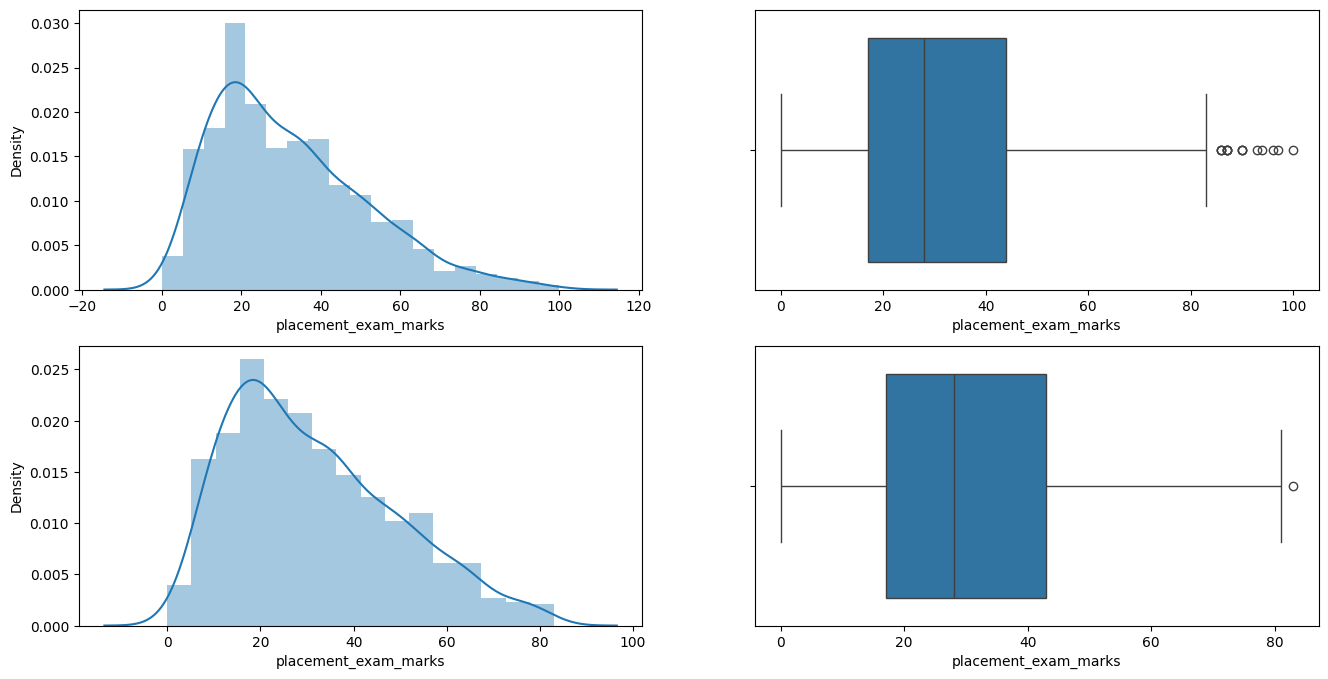

In [16]:
# comparing the both dataframes
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x=new_df['placement_exam_marks'])

# removed the outliers

CAPPPING THE OUTLIERS

In [20]:
# np.where(condn, iftrue,iffalse)

import numpy as np
new_d = np.where(
    df['placement_exam_marks']>upper_bound,
    upper_bound,
    df['placement_exam_marks']
)
new_d.shape

(1000,)